# Вітаю на фінальному проєкті!
Протягом курсу ми навчились завантажувати дані в Python, трансформувати їх, чистити, агрегувати, знаходити з допомогою даних відповіді на наші питання. 
Задача фінального проєкту - продемонструвати той рівень роботи з даними, на якому ви є зараз. 

Цей ноутбук буде присвячений аналізу даних з файла `Grocery DataBase.xlsx`, який є в папці `Дані` на Диску. Так, це Excel файл, але ми можемо дуже просто завантажувати дані з нього у Python. Покажу пару команд для роботи з Excel файлом.

Для початку встановимо бібліотеку, яка потрібна для роботи з Excel файлами з pandas. Можна встановити тут, або в терміналі, але якщо Ви встановлюєте в терміналі, то після того треба перезапустити ядро (Kernel) ноутбуку, аби бібліотека точно підтягнулась. Іноді підтягується і без того, але це на випадок, що робити, якщо компілятор каже, що її не бачить.

In [7]:
!pip install openpyxl

Defaulting to user installation because normal site-packages is not writeable


In [2]:
import numpy as np
import pandas as pd
import pandasql as ps
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind
import scipy.stats as stats

Ось так можемо переглянути, які є листки в Excel файлі:

In [5]:
# замініть на шлях до файлу на своєму комп`ютері
path_to_file = '../Python Tasks/Grocery Database.xlsx'

In [6]:
xl = pd.ExcelFile(path_to_file)
xl.sheet_names

['Grosto DB', 'Sheet2', 'Fact Summary']

А так можемо зчитати конкретний листок:

In [7]:
xl.parse('Fact Summary')

,S.No.,Column Name,Description of the Column names
0,1,Receipt Number,Transaction Number
1,2,Date,Date of Transaction
2,3,Year,Year of Transaction
3,4,Month,Month of Transaction
4,5,Time,Time of the transaction
5,6,Mobile Number,Monbile number of the customer
6,7,Membership ID,Unique Membership ID of the Customer
7,8,Loyalty Card Points,Loyalty Points earned by customer (10 Points/1...
8,9,Age,Age of the Customer in the Company Database
9,10,Gender,Gender of the customer


Читати дані можна і з Pandas, але тут немає можливості переглянути наявні листки, а також довше відбувається читання даних.

In [6]:
df = pd.read_excel(path_to_file)

In [8]:
display(df.shape)

(50447, 32)

In [9]:
df.describe()

,Year,Month,Mobile Number,Loyalty Card Points,Age,Price,QTY,DISC,Amount,Net Bill Amount,GST,Gross Bill Amount,% Profit Margin,% Operating Cost,% Product Cost,Profit Margin,Operating Cost,Product Cost
count,50447.000000,50447.000000,5.044700e+04,50447.000000,50447.000000,50447.000000,50447.000000,50447.000000,50447.000000,50447.000000,50447.000000,50447.000000,50447.000000,5.044700e+04,50447.000000,50447.000000,50447.000000,50447.000000
mean,2017.667968,6.476678,9.893557e+09,18.364263,35.801772,7.424184,1.548179,0.029938,11.167962,66.695212,0.085553,72.378916,0.105550,1.500000e-01,0.744450,1.201682,1.726851,8.583809
std,1.111588,3.454349,7.636461e+07,16.161139,14.020367,4.753588,0.648461,0.014230,9.227162,45.269851,0.023568,49.093636,0.029403,1.321178e-13,0.029403,1.063545,1.426844,7.134957
min,2016.000000,1.000000,7.919903e+09,0.000000,15.000000,0.840000,1.000000,0.010000,0.798000,0.978500,0.060000,1.037210,0.051000,1.500000e-01,0.700000,0.067840,0.126000,0.609840
25%,2017.000000,3.000000,9.839283e+09,6.000000,23.000000,4.280000,1.000000,0.020000,5.213600,35.328000,0.070000,38.615940,0.083000,1.500000e-01,0.722000,0.545600,0.805500,4.082890
50%,2018.000000,7.000000,9.897050e+09,14.000000,35.000000,5.980000,2.000000,0.030000,8.632800,58.586500,0.070000,63.909120,0.109000,1.500000e-01,0.741000,0.928200,1.329000,6.648660
75%,2019.000000,10.000000,9.950153e+09,26.000000,47.000000,9.470000,2.000000,0.040000,14.016000,90.585000,0.100000,98.076440,0.128000,1.500000e-01,0.767000,1.505270,2.178000,10.828800
max,2019.000000,12.000000,9.999984e+09,116.000000,75.000000,40.330000,9.000000,0.050000,299.827200,527.668000,0.120000,559.328080,0.150000,1.500000e-01,0.799000,26.234880,46.848000,239.237120


In [10]:
pd.set_option('display.max_columns', None)

In [72]:
df.head(5)

,Receipt_Number,Date,Year,Month,Time,Mobile_Number,Membership_ID,Loyalty_Card_Points,Age,Gender,City,Country,Category,Sub_Category,Items,Brand,Description,Price,QTY,DISC,Amount,Net_Bill_Amount,GST,Gross_Bill_Amount,Payment_Mode,Bank_Name,%_Profit_Margin,%_Operating_Cost,%_Product_Cost,Profit_Margin,Operating_Cost,Product_Cost,New_Net_Bill_Amount,New_Gross_Bill_Amount,Hour
0,GIJ00001,2016-01-02,2016,1,10:08:03.260000,9793548581,MIDID0001,1,36,Male,Jakarta,Indonesia,"Choco, Snacks, Sweets",Biscuits & Crackers,Oreo mini oreo sharepack,Oreo,540 g,3.09,4,0.02,12.1128,12.1128,0.1,13.32408,Card,Enterprise Bank,0.150,0.15,0.700,1.85400,1.8540,8.65200,12.1128,13.32408,10
1,GIJ00002,2016-01-02,2016,1,15:46:50.832000,9938441276,MIDID0002,2,54,Male,Jakarta,Indonesia,"Wines, Beers & Spirits",Beer,Ashai Lager Beer,Ashai,480 ml,11.60,2,0.01,22.9680,22.9680,0.1,25.26480,Card,Philippine Veterans Bank,0.118,0.15,0.732,2.73760,3.4800,16.98240,22.9680,25.26480,15
2,GIJ00003,2016-01-02,2016,1,11:28:52.166000,9976742552,MIDID0003,1,16,Female,Jakarta,Indonesia,Fruit & Vegetable,Frozen Fruits,Cascadian farm organic strawberries,Cascadiam Farm,1 Kg,13.31,1,0.01,13.1769,38.3526,0.1,42.18786,Cash,BDO Unibank,0.147,0.15,0.703,1.95657,1.9965,9.35693,30.7692,33.84612,11
3,GIJ00003,2016-01-02,2016,1,11:28:52.166000,9976742552,MIDID0003,1,16,Female,Jakarta,Indonesia,Fruit & Vegetable,Fresh Vegetables,Oraganic 4 Life Red onions,Organic 4 Life,270 g,3.52,1,0.01,3.4848,38.3526,0.1,42.18786,Cash,BDO Unibank,0.095,0.15,0.755,0.33440,0.5280,2.65760,30.7692,33.84612,11
4,GIJ00003,2016-01-02,2016,1,11:28:52.166000,9976742552,MIDID0003,2,16,Female,Jakarta,Indonesia,Fruit & Vegetable,Lettuce & Salads,LIVEWELL Italian mesclun salad,LIVEWELL,570 g,4.41,1,0.01,4.3659,38.3526,0.1,42.18786,Cash,BDO Unibank,0.120,0.15,0.730,0.52920,0.6615,3.21930,30.7692,33.84612,11


Бачимо, що у назвах колонок є пробіли, що затрудняє доступ при зверненні до колонок і погіршує сумісність з іншими системами, тому замінимо пробіли на нижнє підкреснення.

In [73]:
df.columns = df.columns.str.replace(" ", "_")
df.columns

Index(['Receipt_Number', 'Date', 'Year', 'Month', 'Time', 'Mobile_Number',
       'Membership_ID', 'Loyalty_Card_Points', 'Age', 'Gender', 'City',
       'Country', 'Category', 'Sub_Category', 'Items', 'Brand', 'Description',
       'Price', 'QTY', 'DISC', 'Amount', 'Net_Bill_Amount', 'GST',
       'Gross_Bill_Amount', 'Payment_Mode', 'Bank_Name', '%_Profit_Margin',
       '%_Operating_Cost', '%_Product_Cost', 'Profit_Margin', 'Operating_Cost',
       'Product_Cost', 'New_Net_Bill_Amount', 'New_Gross_Bill_Amount', 'Hour'],
      dtype='object')

Бачимо, що колонки 'Brand ' і 'Description ' мали пробіл після назви, що точно затруднило б доступ до них і призвело б до помилок. Для зручності, приберемо зайвий символ.

In [42]:
df = df.rename(columns={'Brand_': 'Brand', 'Description_': 'Description'})

В ході дослідження даних, мною було виявлено, що в стовпчику 'Net_Bill_Amount', а відповідно і в 'Gross_Bill_Amount' є помилки. В значній частині даних сума 'Amount' по певному 'Receipt_Number' не відповідає значенню 'Net_Bill_Amount'. Ніякої закономірності чи послідовності я не бачу, щоб пояснити ці неточності даних. В деяких випадках сума 'Amount' по певнову 'Receipt_Number' більша за значення 'Net_Bill_Amount', в деяких - менша. Можливо була якась проблема при вивантажені даних, або помилкові підрахунки. Тому мною було прийнято рішення створити власноруч нові рядки 'New_Net_Bill_Amount' та 'New_Gross_Bill_Amount'.

In [14]:
df['New_Net_Bill_Amount'] = df['Receipt_Number'].map(amount_sums)

In [15]:
df['New_Gross_Bill_Amount'] = df['New_Net_Bill_Amount'] * (1 + 0.1)

In [75]:
df.dtypes

Receipt_Number                   object
Date                     datetime64[ns]
Year                              int64
Month                             int64
Time                             object
Mobile_Number                     int64
Membership_ID                    object
Loyalty_Card_Points               int64
Age                               int64
Gender                           object
City                             object
Country                          object
Category                         object
Sub_Category                     object
Items                            object
Brand                            object
Description                      object
Price                           float64
QTY                               int64
DISC                            float64
Amount                          float64
Net_Bill_Amount                 float64
GST                             float64
Gross_Bill_Amount               float64
Payment_Mode                     object


Перевіримо чи є в наших даних пропущені значення. Для цього запустимо код, що згенерує нам сумму пропущених значень по кожній з колонок.

In [17]:
missing_values = df.isna().sum()
missing_values

Receipt_Number           0
Date                     0
Year                     0
Month                    0
Time                     0
Mobile_Number            0
Membership_ID            0
Loyalty_Card_Points      0
Age                      0
Gender                   0
City                     0
Country                  0
Category                 0
Sub_Category             0
Items                    0
Brand_                   0
Description_             0
Price                    0
QTY                      0
DISC                     0
Amount                   0
Net_Bill_Amount          0
GST                      0
Gross_Bill_Amount        0
Payment_Mode             0
Bank_Name                0
%_Profit_Margin          0
%_Operating_Cost         0
%_Product_Cost           0
Profit_Margin            0
Operating_Cost           0
Product_Cost             0
New_Net_Bill_Amount      0
New_Gross_Bill_Amount    0
dtype: int64

Пропущених значень немає, тож рухаємось далі.

1. Перевіримо хто наші клієнти, їх середній вік та співвідношення чоловіків і жінок у нашому датасеті.

In [156]:
unique_members = df.drop_duplicates(subset=['Membership_ID', 'Gender'])

In [161]:
unique_members.groupby('Gender').agg({'Age':'mean'})

,Age
Gender,
Female,36.186965
Male,35.971944


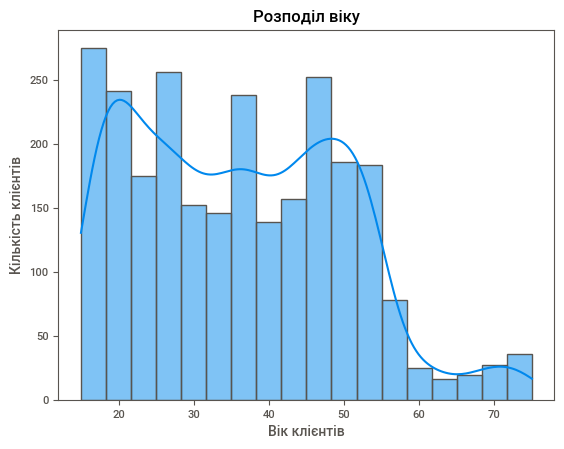

In [193]:
sns.histplot(unique_members['Age'], kde=True)
plt.title('Розподіл віку')
plt.ylabel('Кількість клієнтів')
plt.xlabel('Вік клієнтів')
plt.show()

In [160]:
unique_members.Age.describe()

count    2601.000000
mean       36.145713
std        13.995875
min        15.000000
25%        24.000000
50%        36.000000
75%        47.000000
max        75.000000
Name: Age, dtype: float64

На основі цього аналізу можна зробити наступні висновки:

- Більшість покупців мають вік від 24 до 47 років.
- Вік покупців варіюється від 15 до 75 років, але середнє значення близьке до 36 років.
- Є значний розкид віку покупців, як це показує стандартне відхилення в 13.99 років.
- Ця інформація може бути корисною для розуміння цільової аудиторії магазину 

In [162]:
gender_counts = unique_members['Gender'].value_counts()
gender_counts

Female    2102
Male       499
Name: Gender, dtype: int64

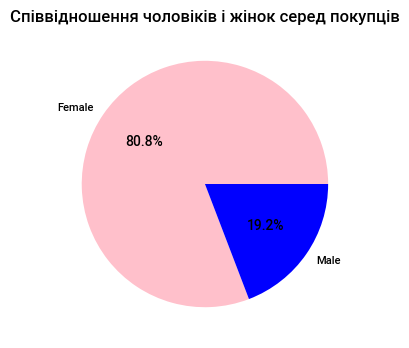

In [166]:
gender_counts.plot(kind='pie', figsize=(6, 4), autopct='%1.1f%%', colors=['pink', 'blue'])
plt.title('Співвідношення чоловіків і жінок серед покупців')
plt.ylabel('')
plt.show()

Тож ми бачимо, що відсоток покупців жінок значно перевищує відсоток покупців чоловіків 80.8 до 19.2. Ми можемо зробити висновок, що основна наша цільовааудиторія - це жінки. Знучи цю інформацію, ми можемо краще налаштовувати товарний асортимент та маркетингові кампанії.

2. Яке середнє значення чеку для жінок і чоловіків у кожній з категорій товарів

In [164]:
unique_receipts = df.drop_duplicates(subset='Receipt_Number')

In [25]:
avg_bill_by_gender_and_category = unique_receipts.pivot_table(index='Gender', columns='Category', values='New_Gross_Bill_Amount', aggfunc='mean')
avg_bill_by_gender_and_category.style.background_gradient(axis=0)

Category,Bakery & Breakfast,Beauty,Beverages,"Choco, Snacks, Sweets","Dairy, Chilled & Eggs",Frozen,Fruit & Vegetable,Health,Household,Kitchen & Dining,Meat & Seafood,Mother & Baby,Party Supplies,Pet Care,Rice & Cooking Essentials,"Wines, Beers & Spirits"
Gender,,,,,,,,,,,,,,,,
Female,46.352310,55.262747,49.915060,50.319545,44.294174,52.809044,47.598274,62.107300,52.670860,44.949607,53.177441,52.385013,38.063747,44.377260,41.291732,36.207741
Male,44.365665,49.860346,49.091514,46.720498,44.932765,47.689226,42.587341,45.926193,47.066381,42.738755,57.643086,58.151897,38.427031,47.957766,42.213194,35.121996


3. Створимо візуалізацію, а саме boxplot для відображення розподілу значень сум чеків для різних груп за статтю 

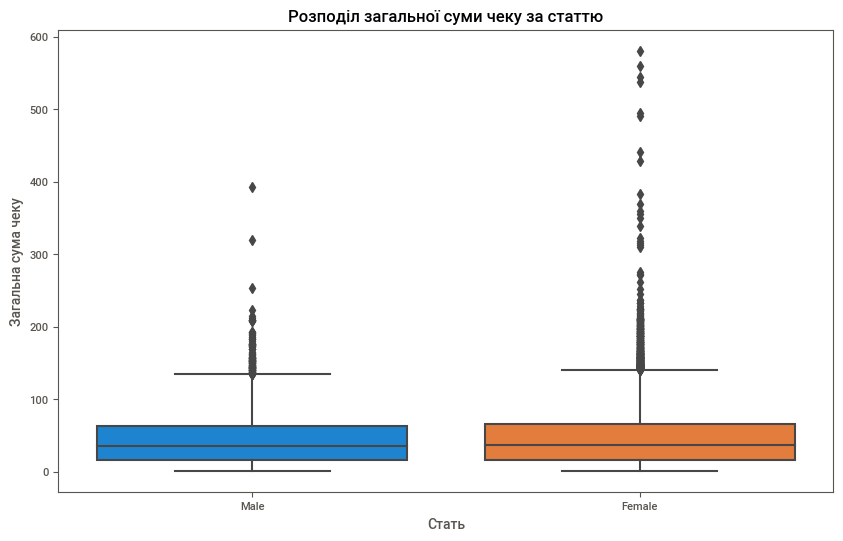

In [192]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Gender', y='New_Gross_Bill_Amount', data=unique_receipts)

plt.title('Розподіл загальної суми чеку за статтю')
plt.ylabel('Загальна сума чеку')
plt.xlabel('Стать')
plt.show()

По графіку ми бачимо, що показник медіани розміру чека чоловіків і жінок майже однаковий, але також ми спостерігаєм значну частину викидів у жінок. Це може свідчити про те, що жінки можуть купувати дорожчі товари чи товари в більших обсягах, або можуть вказувати на конкретні акції, які були дуже популярні серед жінок.

4. Перевіримо чи є відмінність у розмірі середнього чеку у жінок і чоловіків.

In [144]:
avg_bill_by_gender = unique_receipts.groupby('Gender')['New_Gross_Bill_Amount'].mean().reset_index()

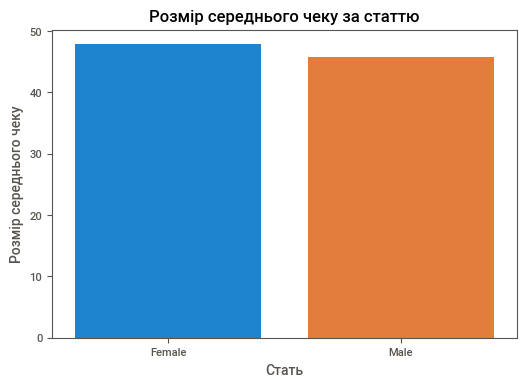

In [194]:
plt.figure(figsize=(6, 4))
sns.barplot(data=avg_bill_by_gender, x='Gender', y='New_Gross_Bill_Amount')
plt.title('Розмір середнього чеку за статтю')
plt.ylabel('Розмір середнього чеку')
plt.xlabel('Стать')
plt.show()

Ми бачимо, що є невелика різниця у середньому чекові чоловіків і жінок. Але чи є ця різниця статистично значущою, перевіримо з допомогою t-тесту. Загрегуємо дані таким чином, щоб відфільтрувати дублікати Receipt Number, та проведемо t-тест на агрегованих даних, що допоможе отримати більш точні результати щодо відмінностей у середніх чеках між чоловіками та жінками. 

In [30]:
male_bills = unique_receipts[unique_receipts['Gender'] == 'Male']['New_Gross_Bill_Amount']
female_bills = unique_receipts[unique_receipts['Gender'] == 'Female']['New_Gross_Bill_Amount']
t_stat, p_value = ttest_ind(male_bills, female_bills)

print(f't-статистика: {t_stat}')
print(f'p-значення: {p_value}')
if p_value < 0.05:
    print("Різниця статистично значуща: є відмінність у середніх чеках між чоловіками та жінками.")
else:
    print("Різниця нестатистично значуща: немає доказів відмінності у середніх чеках між чоловіками та жінками.")

t-статистика: -1.9914352670797746
p-значення: 0.04645387181313737
Різниця статистично значуща: є відмінність у середніх чеках між чоловіками та жінками.


5. Перевіримо чи є залежність між віком покупця та сумою чека.

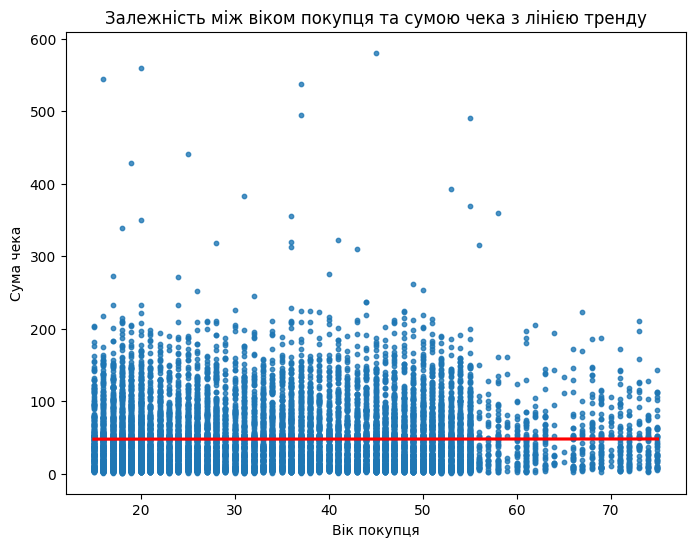

In [32]:
plt.figure(figsize=(8,6))
sns.regplot(data=unique_receipts, x='Age', y='New_Gross_Bill_Amount', scatter_kws={'s':10}, line_kws={'color':'red'}, ci=None)
plt.title('Залежність між віком покупця та сумою чека з лінією тренду')
plt.xlabel('Вік покупця')
plt.ylabel('Сума чека')
plt.show()

На графіку ми бачимо, що лінія тренду виявляється горизонтальною, це може вказувати на відсутність лінійної кореляції між віком покупця та сумою чека.

6. Який розмір середнього чеку по роках

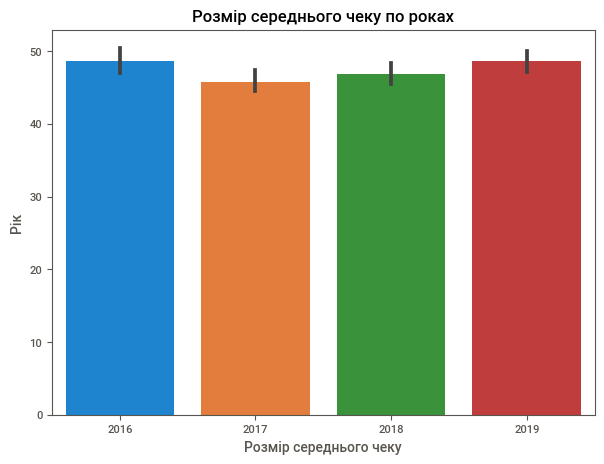

In [195]:
plt.figure(figsize=(7,5))
sns.barplot(data=unique_receipts, x='Year', y='New_Gross_Bill_Amount')
plt.title('Розмір середнього чеку по роках')
plt.xlabel('Розмір середнього чеку')
plt.ylabel('Рік')
plt.show()

7. Подивимось яка динаміка продажів по рокам

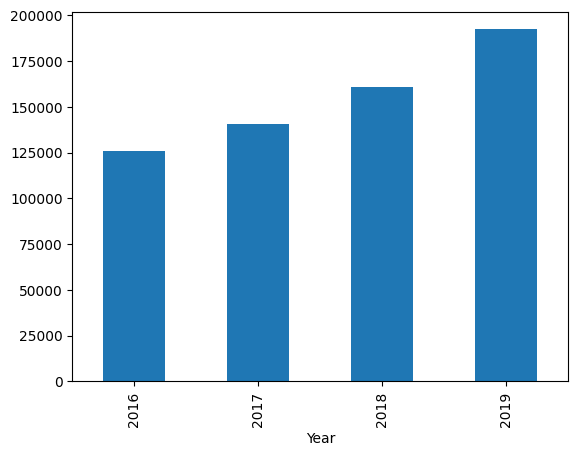

In [38]:
yearly_sales = unique_receipts.groupby('Year')['New_Gross_Bill_Amount'].sum().plot.bar();

На графіку спостерігаємо позитивну динаміку.

8. Далі дослідимо як змінюється відсоток прибутковості по місяцях/роках

In [151]:
profit_monthly_percentage = df.groupby(['Year', 'Month'])['%_Profit_Margin'].mean().reset_index()

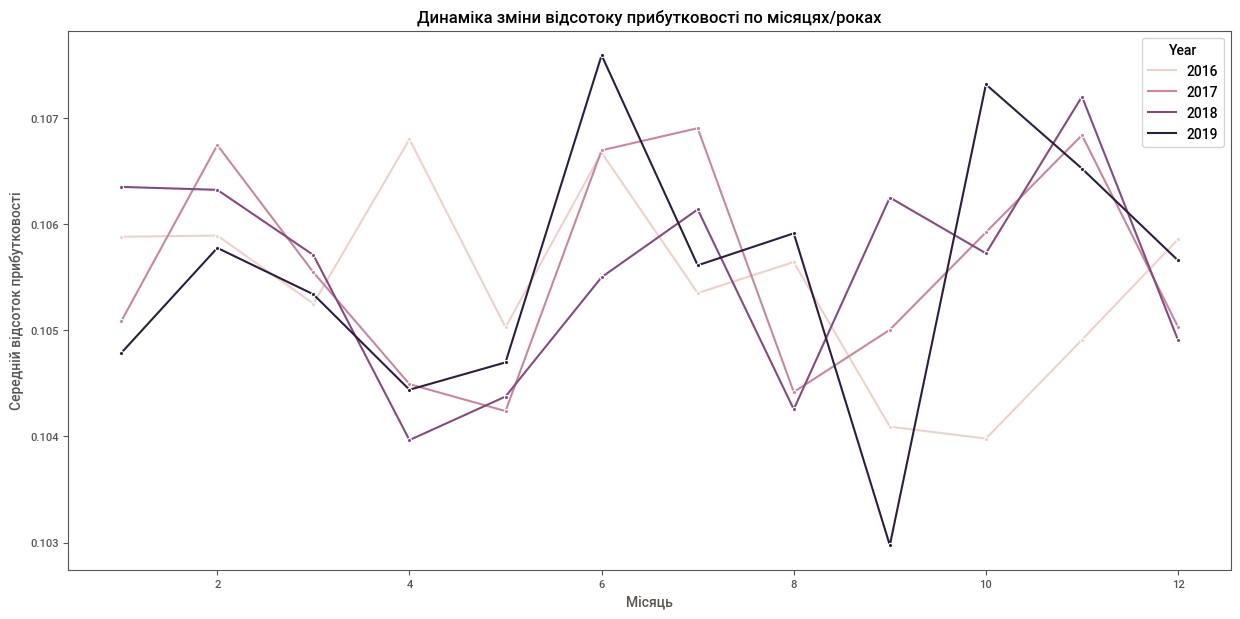

In [196]:
plt.figure(figsize=(15,7))
sns.lineplot(data=profit_monthly_percentage, x='Month', y='%_Profit_Margin', hue='Year', marker='o')
plt.title('Динаміка зміни відсотоку прибутковості по місяцях/роках')
plt.ylabel('Середній відсоток прибутковості')
plt.xlabel('Місяць')
plt.show()

9. Які міста приносять найбільший прибуток магазину?

In [106]:
city_profit = df.groupby('City')['Profit_Margin'].sum().sort_values(ascending=False)

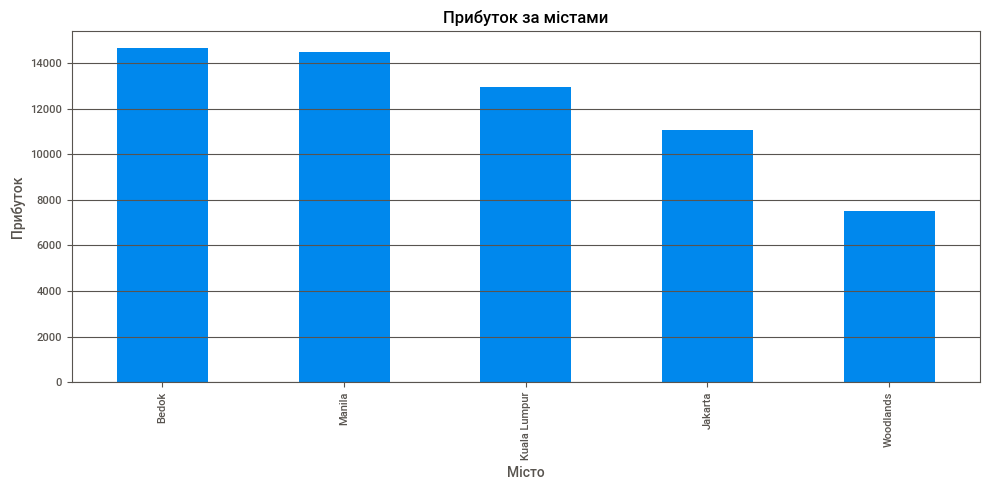

In [107]:
city_profit.plot(kind='bar', figsize=(10, 5))
plt.title('Прибуток за містами')
plt.ylabel('Прибуток')
plt.xlabel('Місто')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

Ця візуалізація дає нам змогу зрозуміти, в місті Bedok (Singapore) магазин працює найефективніше. Можливо, варто вкладати більше в рекламу в цьому місті або розглядати можливість відкриття нових магазинів.

10. Яка категорія товару є найбільш популярною?

In [43]:
df.Category.unique()

array(['Choco, Snacks, Sweets', 'Wines, Beers & Spirits',
       'Fruit & Vegetable', 'Pet Care', 'Meat & Seafood', 'Mother & Baby',
       'Bakery & Breakfast', 'Household', 'Beverages', 'Beauty',
       'Dairy, Chilled & Eggs', 'Frozen', 'Kitchen & Dining',
       'Party Supplies', 'Rice & Cooking Essentials', 'Health'],
      dtype=object)

In [51]:
popular_category_by_sales = df.groupby('Category')['Amount'].sum().sort_values(ascending=False).reset_index()

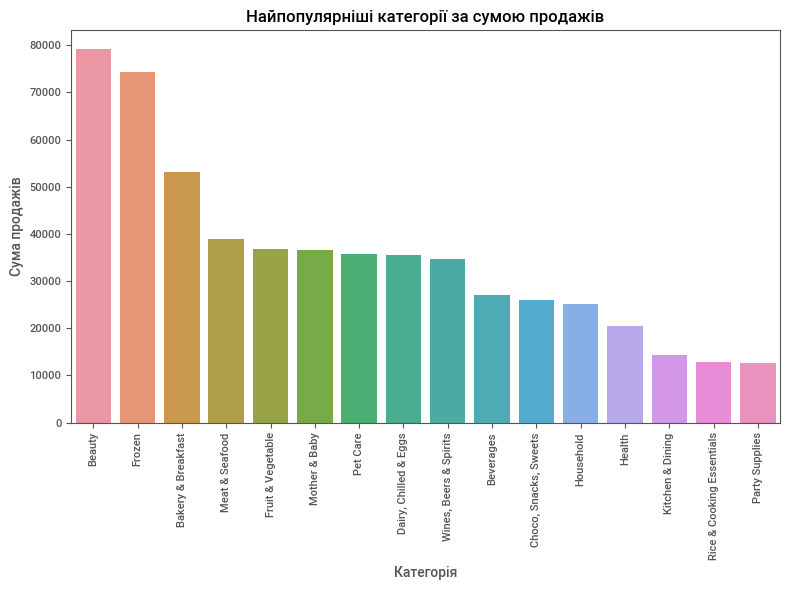

In [197]:
plt.figure(figsize=(8,6))
sns.barplot(data=popular_category_by_sales, x='Category', y='Amount')
plt.title('Найпопулярніші категорії за сумою продажів')
plt.ylabel('Сума продажів')
plt.xlabel('Категорія')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [144]:
query = """
SELECT Category, SUM(Amount) as Total_Sales
FROM df
GROUP BY Category
ORDER BY Total_Sales DESC
"""

result = ps.sqldf(query)
print(result)

                     Category  Total_Sales
0                      Beauty   79185.5923
1                      Frozen   74296.7194
2          Bakery & Breakfast   53162.5921
3              Meat & Seafood   38975.0958
4           Fruit & Vegetable   36783.0941
5               Mother & Baby   36549.9824
6                    Pet Care   35699.7611
7       Dairy, Chilled & Eggs   35460.4534
8      Wines, Beers & Spirits   34641.1768
9                   Beverages   27042.0524
10      Choco, Snacks, Sweets   26064.0177
11                  Household   25215.7615
12                     Health   20413.2236
13           Kitchen & Dining   14343.7392
14  Rice & Cooking Essentials   12841.2445
15             Party Supplies   12715.6707


11. Яка категорія товару є найбільш прибутковою? 

In [115]:
category_by_profit = df.groupby('Category')['%_Profit_Margin'].mean().sort_values(ascending=False)

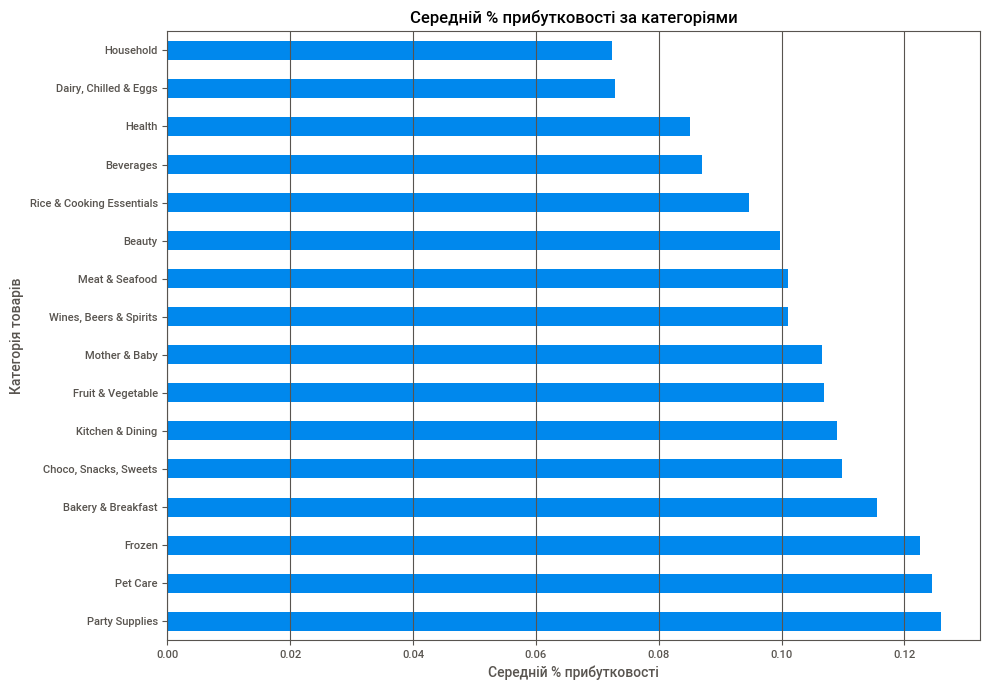

In [198]:
category_by_profit.plot(kind='barh', figsize=(10, 7))
plt.title('Середній % прибутковості за категоріями')
plt.xlabel('Середній % прибутковості')
plt.ylabel('Категорія товарів')
plt.grid(axis='x')
plt.tight_layout()
plt.show()

Ця інформація допоможе нам сконцентруватися на просуванні товарів з високим % прибутковості

12. Які бренди продаються найкраще 

In [65]:
top_brands = df.groupby('Brand')['QTY'].sum().sort_values(ascending=False).head(10)
top_brands

Brand
Biogreen         1795
BonJour          1667
RedMart          1400
Sainbury         1314
Liang Teck       1251
ThyGrace         1246
Ashai            1240
Anchor           1156
Nature's Gift    1148
Alpo             1146
Name: QTY, dtype: int64

Tаким чином, ми бачимо топ-10 брендів, які продаються найкраще сумарну кількість товару для кожного унікального поєднання бренду та категорії, без поділу на категорії товарів.

In [63]:
top_brands_by_category = df.groupby(['Brand', 'Category'])['QTY'].sum().reset_index().sort_values(by='QTY', ascending=False).head(10)
top_brands_by_category

,Brand,Category,QTY
41,BonJour,Bakery & Breakfast,1667
309,Sainbury,"Choco, Snacks, Sweets",1314
354,ThyGrace,Fruit & Vegetable,1246
18,Ashai,"Wines, Beers & Spirits",1240
238,Nature's Gift,Pet Care,1148
11,Alpo,Pet Care,1146
219,Millenium Horse,Party Supplies,1123
35,Biogreen,Party Supplies,1120
12,Anchor,"Dairy, Chilled & Eggs",1073
383,Yakult,"Dairy, Chilled & Eggs",1008


В цьому випадку ми отримуємо розподілену кількість продажів топових брендів по кожній категорії.
На основі цих даних ми можемо розуміти, які бренди і категорії є найбільш популярними серед покупців та зрозуміти, на які товари можна зосередитися для подальших акцій або знижок.

13. Перевіримо які товари купують разом найчастіше

In [183]:
from collections import Counter
from itertools import combinations, chain

In [189]:
grouped_items = df.groupby('Receipt_Number')['Items'].apply(list)

In [184]:
pairs = grouped_items.apply(lambda items: list(combinations(items, 2)))
all_pairs = list(chain.from_iterable(pairs))

In [185]:
pair_counts = Counter(all_pairs)

In [190]:
df_pairs_items = pd.DataFrame(pair_counts.most_common(), columns=['Пара товарів', 'Частота'])

In [191]:
df_pairs_items.head(10)

,Пара товарів,Частота
0,"(Ashai Lager Beer, Sainsbury salted tortilla c...",775
1,"(Fresh Soyamilk, Original wholemeal bread)",607
2,"(Fresh Soyamilk, Anchor salted pure butter)",607
3,"(Original wholemeal bread, Anchor salted pure ...",607
4,"(Lamb pate dog food, Alpo Chicken pate dog food)",545
5,"(Alpo Chicken pate dog food, PEDIGREE Adult co...",545
6,"(Lamb pate dog food, PEDIGREE Adult complete n...",544
7,"(Nutro Beef with vegetables dog food, PEDIGREE...",544
8,"(Lamb pate dog food, Nutro Beef with vegetable...",543
9,"(Nutro Beef with vegetables dog food, Alpo Chi...",543


In [188]:
for (item1, item2), count in pair_counts.most_common(10):
    print(f"'{item1}' і '{item2}' купують разом {count} разів.")

'Ashai Lager Beer' і 'Sainsbury salted tortilla chips' купують разом 775 разів.
'Fresh Soyamilk' і 'Original wholemeal bread' купують разом 607 разів.
'Fresh Soyamilk' і 'Anchor salted pure butter' купують разом 607 разів.
'Original wholemeal bread' і 'Anchor salted pure butter' купують разом 607 разів.
'Lamb pate dog food' і 'Alpo Chicken pate dog food' купують разом 545 разів.
'Alpo Chicken pate dog food' і 'PEDIGREE Adult complete nuritition dog food' купують разом 545 разів.
'Lamb pate dog food' і 'PEDIGREE Adult complete nuritition dog food' купують разом 544 разів.
'Nutro Beef with vegetables dog food' і 'PEDIGREE Adult complete nuritition dog food' купують разом 544 разів.
'Lamb pate dog food' і 'Nutro Beef with vegetables dog food' купують разом 543 разів.
'Nutro Beef with vegetables dog food' і 'Alpo Chicken pate dog food' купують разом 543 разів.


Дана інформація може допомогти бізнесу краще розуміти потреби і поведінку своїх користувачів, оптимізувати розсташуівння товарів на полицях магазину, спланувати маркетингові акції і тим саимм підвищити рівеь свого доходу. 

14. У який час доби здійснюється найбільше покупок?

Для того, щоб зручніше було проводити аналіз по годинах, створимо нову колонку 'Hour'

In [76]:
df['Hour'] = df['Time'].apply(lambda x: int(str(x).split(':')[0]))

In [87]:
sales_by_hour = unique_receipts.groupby('Hour').size().sort_values(ascending=False)
sales_by_hour 

Hour
13    1133
20    1133
19    1106
21    1101
15    1094
10    1093
12    1086
18    1081
16    1072
14    1057
17    1057
11    1035
dtype: int64

Ми бачимо, що найбільше покупок здійснюється в 13 і в 20 годин. Перевіримо, чи години з найбільшою кількістю покупок є годинами з найбільшою сумою продажу.

In [85]:
hourly_sales = unique_receipts.groupby('Hour')['New_Gross_Bill_Amount'].sum()

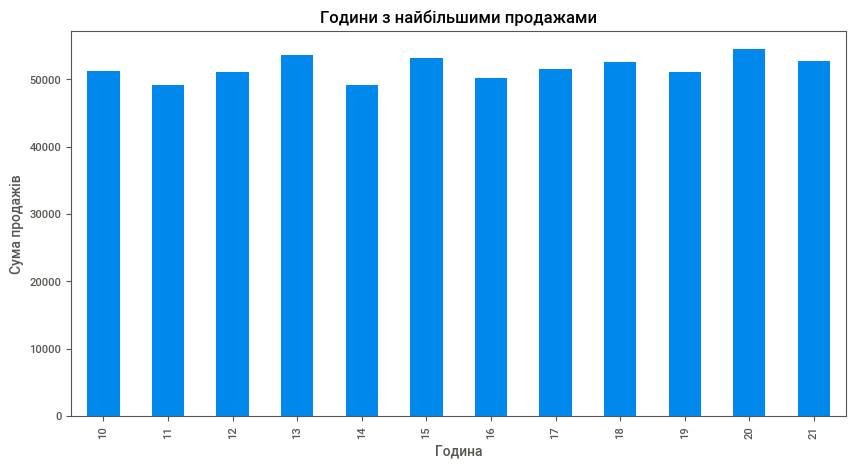

In [86]:
plt.figure(figsize=(10, 5))
hourly_sales.plot(kind='bar', title='Години з найбільшими продажами')
plt.xlabel('Година')
plt.ylabel('Сума продажів')
plt.show()

Бачимо, що і тут за продажами лідирують 13 і 20 години. Ця інформація дозволяє оптимізувати графік роботи магазину, персоналу, а також рекламних кампаній

In [109]:
hourly_profit = df.groupby('Hour')['Profit_Margin'].sum()

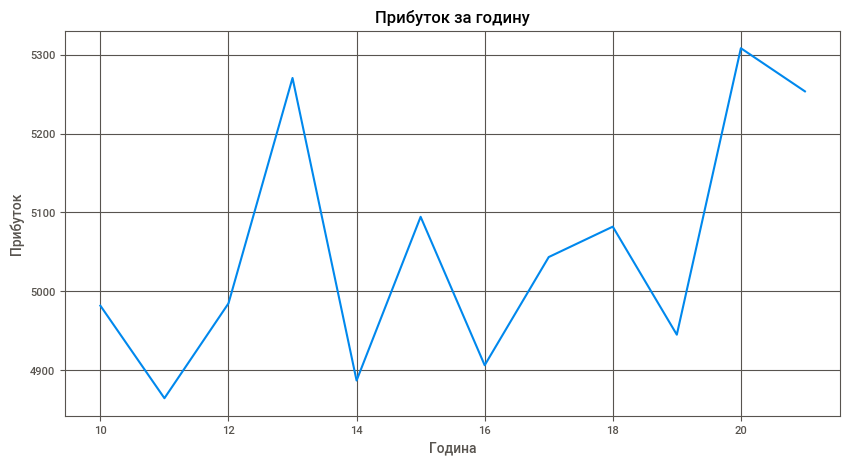

In [110]:
hourly_profit.plot(kind='line', figsize=(10, 5))
plt.title('Прибуток за годину')
plt.ylabel('Прибуток')
plt.xlabel('Година')
plt.grid(True)
plt.show()

З цього графіку ми можемо зрозуміти, коли магазин отримує найбільший прибуток, а саме - о 13 і 20 годинах, і налаштувати рекламні кампанії та акції відповідно.

15. Яка динаміка надходження нових покупців за рік?

In [133]:
new_customers = df.groupby(['Year'])['Mobile Number'].nunique()

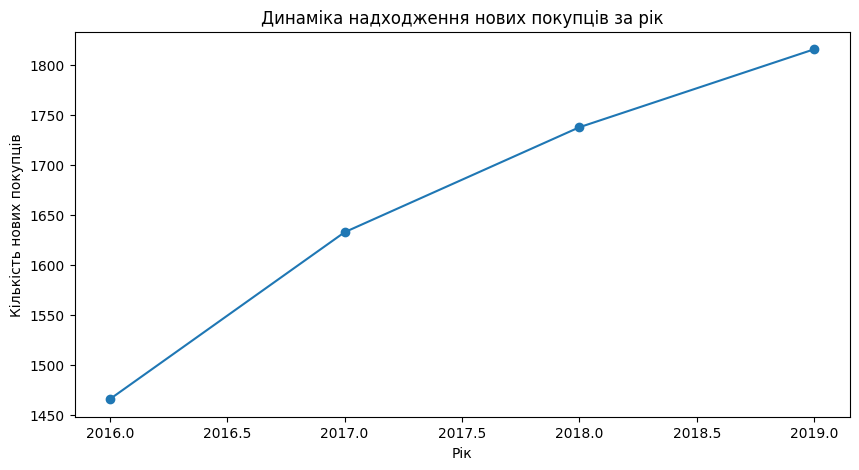

In [134]:
plt.figure(figsize=(10, 5))
new_customers.plot(kind='line', marker='o')
plt.title('Динаміка надходження нових покупців за рік')
plt.xlabel('Рік')
plt.ylabel('Кількість нових покупців')
plt.show()

Ми можемо спостерігати позитивну динаміку і стабільний приріст нових клієнтів з 1470 в 2016 році до 1850 в 2019 році. Можемо зробити висновки, що магазин досить успішно залучають нових клієнтів кожен рік, що може свідчити про ефективність маркетингових кампаній та рекламних акцій. На основі цих даних можна було б провести глибший аналіз поведінки нових покупців, їхніх покупок, відгуків та лояльності, а також взяти до уваги зовнішні фактори, такі як конкуренція та загальний стан ринку.

16. Перевіримо динаміку транзакцій по рокам

In [165]:
transactions_by_year = df.groupby('Year')['Receipt Number'].nunique().reset_index()
transactions_by_year

,Year,Receipt Number
0,2016,2587
1,2017,3067
2,2018,3439
3,2019,3955


In [132]:
transactions_by_country = df.groupby(['Country', 'Year'])['Receipt_Number'].nunique().reset_index()

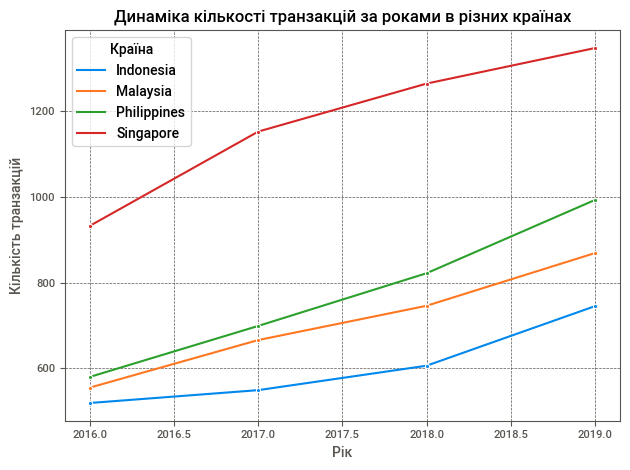

In [131]:
sns.lineplot(data=transactions_by_country, x='Year', y='Receipt_Number', hue='Country', marker='o')
plt.title('Динаміка кількості транзакцій за роками в різних країнах')
plt.xlabel('Рік')
plt.ylabel('Кількість транзакцій')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend(title='Країна')
plt.tight_layout()
plt.show()

In [138]:
pivot_sales = unique_receipts.pivot_table(values='New_Gross_Bill_Amount', index='Month', columns='Year', aggfunc='sum')

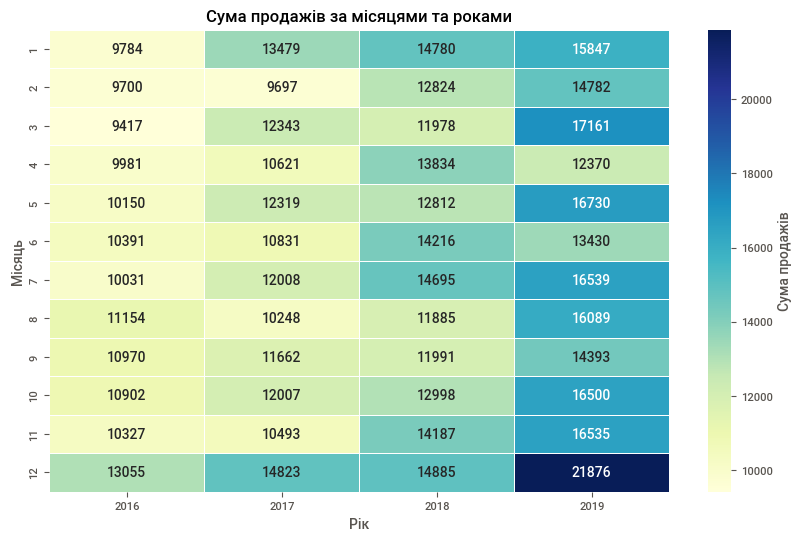

In [139]:
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_sales, annot=True, fmt=".0f", cmap='YlGnBu', linewidths=.5, cbar_kws={'label': 'Сума продажів'})

plt.title('Сума продажів за місяцями та роками')
plt.xlabel('Рік')
plt.ylabel('Місяць')
plt.show()

17. Який спосіб оплати найпопулярніший?

In [105]:
df['Payment_Mode'].value_counts()

Card      17149
Wallet    16867
Cash      16431
Name: Payment_Mode, dtype: int64

На основі цих даних ми можемо побачити, що найпопулярніший метод оплати це Card, а інші платіжні методи потребують покращення або просування.

18. Також, для швидкого огляду і аналізу даних ми можемо використати бібліотеку Sweetviz. Завдяки цьому звіту ми можемо ознайомитись з властивостями ознак, категоріальними асоціаціями, числовими асоціаціями, найбільш частотними, найменшими, найбільшими значення числових ознак.

In [81]:
import sweetviz as sv
import warnings

with warnings.catch_warnings(record=True):
    report = sv.analyze(df)
report.show_html('Grocery Database.html')

                                             |                                             | [  0%]   00:00 ->…

Report Grocery Database.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


В файлі ви знайдете самі дані та опис колонок.   

**Задача**: Уявіть, що Вам дали цей набір даних з питанням "Що корисного ми можемо з них взяти для розвитку нашого бізнесу?". То Вам необхідно розказати бізнесу історію про ці дані у форматі
1. питання, яке Вас як робітника цього бізнесу, який дуже вболіває за його успіх, цікавить щодо цих даних
2. код для відповіді на це питання
3. висновки, які я можу зробити з огляду на результат виконання коду: які рішення ми можемо прийняти щодо подальших кроків в аналізі або які рекомендації Ви б дали бізнесу виходячи з результатів.

**Необхідно** поставити до даних _мінімум_ 10 бізнес-питань, при цьому зробивши   
- початковий аналіз даних: їх розмір, структура, наявність пропущених значень та що з ними зробити, зміна типів даних там, де це доречно зробити (наприклад, якщо колонка завантажилась як тип string, а з опису видно, що там має бути float) - ця частина не входить у бізнес-питання, але є необхідною при аналізі даних.  
- _мінімум_ 1 зведену таблицю або її аналог
- _мінімум_ 5 візуалізацій, 3 з яких мають різний тип (наприклад, scatter plot, line plot, pair plot)

В даному мінімум-наборі немає вимоги на використання SQL та тестування статистичних гіпотез. Але якщо Вам хочеться потренуватись, то Ви можете це зробити скориставшись pandasql, а також перевірити, чи є відмінність між двома групами у якомусь показнику з допомогою тестування статистичних гіпотез. Останнє найбільш доречно, якщо, наприклад, ми беремо чоловіків і жінок, бачимо що у них доволі схожі середні чеки, але наче відрізняються. Аби зрозуміти, чи різниця статистично значущою, можна це перевірити з допомогою тестування стат. гіпотез.

Питанням може бути як "Яка є кількість унікальних чеків в цьому наборі даних?" так і щось значно складніше. Якщо у Вас складне питання, і аби відповісти на нього Ви мали відповісти на 3 менших питання (зробити якісь трансформації над даними, подивитись щось), то це рахується як 3 питання з 10 необхідних у завданні. Звісно ж Ви можете зробити більше за встановлений мінімум - все буде перевірено :)

Тут є великий простір для Вашої фантазії. **Тому рекомендація:** виділіть на це завданні певну кількість годин (наприклад, середнє значення по тому, скільки у Вас займало виконання домашніх завдань в курсі, але я рекомендую не менше 2х годин роботи)
і поставте собі за ціль всю роботу вмістити в цю кількість годин.
Це дозволить Вам управляти своїм часом, пріоритизувати питання, які ставите до даних. І так часто є в роботі: коли ми не знаємо, що ми шукаємо, ми ставимо обмеження по часу (задача типу spike) і робимо все, що встигнемо, за цей час.

По закінченню - завантажуємо ноутбук на git і додаємо посилання в здачу роботи в Eduflow. 
До речі, з часом, вам може захотітись доповнити цей ноутбук, коли арсенал ваших навичок по роботі з даними розшириться. І це буде чудова ідея!

**Успіхів!**